# Start

## Drive mount

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
import os
os.chdir('/content/drive/My Drive/Thesis2')

Mounted at /content/drive


## Libraries

In [ ]:
!pip install statsforecast mlforecast neuralforecast datasetsforecast s3fs pyarrow datasetsforecast lightgbm xgboost fastparquet dask distributed seaborn
import pandas as pd
import numpy as np
import os
os.environ['NIXTLA_ID_AS_COL'] = '1'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.5/221.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.5/223.5 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.2/812.2 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.9/176.9 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

# PRT data

## Uni

Load from Dataforecast https://nixtlaverse.nixtla.io/datasetsforecast/long_horizon.html#ecl following Li, S et al. Enhancing the locality and breaking the memory bottleneck of Transformer on time series forecasting. NeurIPS 2019 https://arxiv.org/abs/1703.07015

In [ ]:
from datasetsforecast.long_horizon import LongHorizon
Y_df, _, _ = LongHorizon.load(directory='./', group='ECL')
Y_df['ds'] = pd.to_datetime(Y_df['ds'])
n_time = len(Y_df.ds.unique())
val_size = int(.2 * n_time)
test_size = int(.2 * n_time)

Y_df.groupby('unique_id').head(2)

,unique_id,ds,y
0,0,2016-07-01 02:00:00,-0.449788
1,0,2016-07-01 03:00:00,-0.287512
26304,1,2016-07-01 02:00:00,-1.748271
26305,1,2016-07-01 03:00:00,-0.872804
52608,10,2016-07-01 02:00:00,0.302676
...,...,...,...
8364673,98,2016-07-01 03:00:00,3.539180
8390976,99,2016-07-01 02:00:00,-0.636534
8390977,99,2016-07-01 03:00:00,-0.100316
8417280,OT,2016-07-01 02:00:00,-2.162911


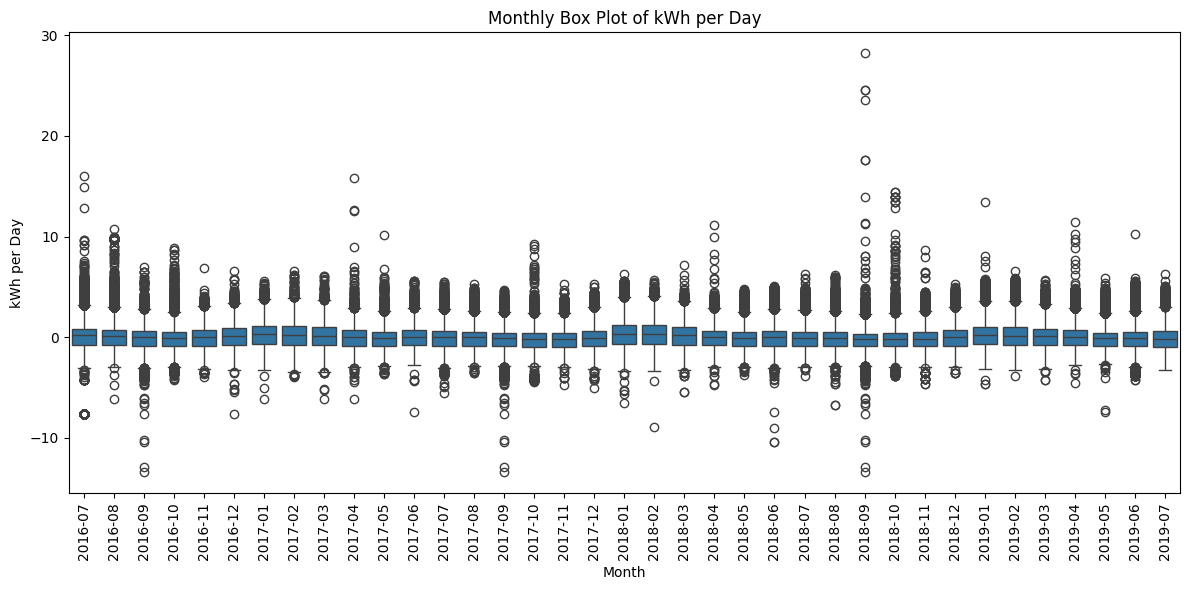

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Y_imp_df_train_month = Y_df.copy()
# Generate a time series box plot aggregated by month
Y_imp_df_train_month['month'] = Y_imp_df_train_month['ds'].dt.to_period('M')
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='y', data=Y_imp_df_train_month)
plt.xticks(rotation=90)
plt.title('Monthly Box Plot of kWh per Day')
plt.xlabel('Month')
plt.ylabel('kWh per Day')
plt.tight_layout()
plt.show()

Mean ADF Statistic: -8.444858219392815
Median ADF Statistic: -7.276251133697133
Number of stationary time series: 315
Number of non-stationary time series: 6
Mean Autocorrelation: [ 1.          0.90681945  0.76617895  0.60914876  0.44515758  0.28736711
  0.14553506  0.02306262 -0.07316157 -0.14294393 -0.1887999  -0.21346681
 -0.22157063 -0.21851713 -0.19893996 -0.158546   -0.0945996  -0.00448618
  0.11136687  0.24610084  0.39556981  0.54909817  0.69310631  0.81514496
  0.87907453  0.81139758  0.68578807  0.53860648  0.38235588  0.23070965
  0.09414211 -0.02323111 -0.11539881 -0.18209159 -0.2257466  -0.24873852
 -0.25548534 -0.25114484 -0.23059615 -0.18984703 -0.12620657 -0.03711243
  0.07706116  0.21016377  0.35763158  0.50873861  0.65005379  0.7688792
  0.8303326   0.76750238  0.64749315  0.50504894  0.35278264  0.20412744
  0.07002076 -0.0448484  -0.13501922 -0.2000801  -0.24240485 -0.26444239
 -0.27022591 -0.26452595 -0.2426903  -0.20084367 -0.13653888 -0.04717579
  0.06674624  0.19

<ipython-input-10-c73ca8da3c98>:70: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(mean_autocorr, use_line_collection=True)
<ipython-input-10-c73ca8da3c98>:77: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(mean_partial_autocorr, use_line_collection=True)


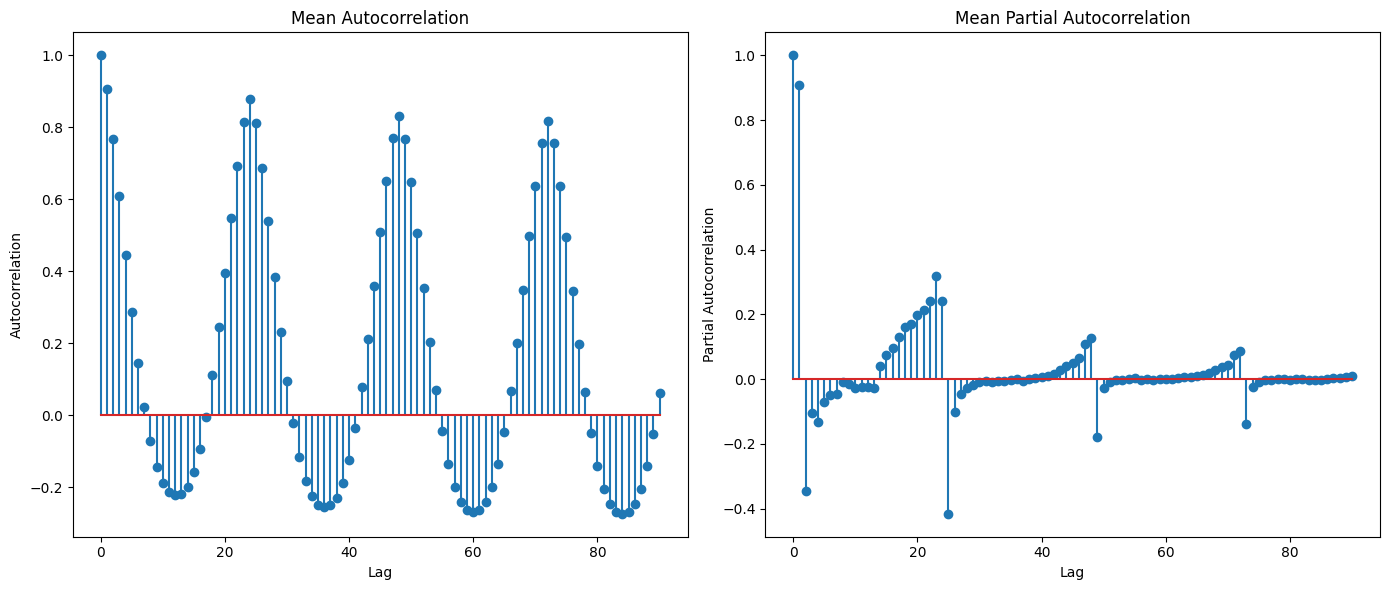

In [ ]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Assuming your DataFrame is named df
adf_results = []

# Loop through each unique_id
for unique_id, group_data in Y_df.groupby('unique_id'):
    # Apply ADF test to the 'y' column of the group_data
    result = adfuller(group_data['y'])
    adf_results.append((unique_id, result[0], result[1]))

# Convert results to DataFrame
adf_results_df = pd.DataFrame(adf_results, columns=['unique_id', 'ADF Statistic', 'p-value'])

# Calculate mean or median of ADF statistic
adf_statistic_mean = adf_results_df['ADF Statistic'].mean()
adf_statistic_median = adf_results_df['ADF Statistic'].median()

# Set threshold
threshold = 0.05  # You can adjust this threshold based on your significance level

# Determine stationary or non-stationary based on threshold
stationary_ids = adf_results_df[adf_results_df['p-value'] < threshold]['unique_id'].tolist()
non_stationary_ids = adf_results_df[adf_results_df['p-value'] >= threshold]['unique_id'].tolist()

# Summary
print(f"Mean ADF Statistic: {adf_statistic_mean}")
print(f"Median ADF Statistic: {adf_statistic_median}")
print(f"Number of stationary time series: {len(stationary_ids)}")
print(f"Number of non-stationary time series: {len(non_stationary_ids)}")

# Assuming df is your DataFrame with columns unique_id, ds, and y

# Step 1: Group by unique_id
groups = Y_df.groupby('unique_id')

# Step 2: Compute autocorrelation and partial autocorrelation for each group
autocorr_results = []
partial_autocorr_results = []

nlags = 90
for name, group in groups:
    autocorr = sm.tsa.acf(group['y'], nlags=nlags)  # Adjust nlags as needed
    partial_autocorr = sm.tsa.pacf(group['y'], nlags=nlags)  # Adjust nlags as needed
    autocorr_results.append(autocorr)
    partial_autocorr_results.append(partial_autocorr)

# Step 3: Aggregate results using mean or median
mean_autocorr = np.mean(autocorr_results, axis=0)
mean_partial_autocorr = np.mean(partial_autocorr_results, axis=0)

# Step 4: Apply thresholding to determine significance
threshold = 0.05  # Define your threshold here
significant_autocorr = np.abs(mean_autocorr) > threshold
significant_partial_autocorr = np.abs(mean_partial_autocorr) > threshold

# Print or use the results as needed
print("Mean Autocorrelation:", mean_autocorr)
print("Mean Partial Autocorrelation:", mean_partial_autocorr)
print("Significant Autocorrelation:", significant_autocorr)
print("Significant Partial Autocorrelation:", significant_partial_autocorr)

# Plotting
plt.figure(figsize=(14, 6))

# Mean Autocorrelation plot
plt.subplot(1, 2, 1)
plt.stem(mean_autocorr, use_line_collection=True)
plt.title('Mean Autocorrelation')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

# Mean Partial Autocorrelation plot
plt.subplot(1, 2, 2)
plt.stem(mean_partial_autocorr, use_line_collection=True)
plt.title('Mean Partial Autocorrelation')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')

# Show plot
plt.tight_layout()
plt.show()

# Load pre trained model

In [ ]:
import numpy as np
import pandas as pd
import torch

import matplotlib.pyplot as plt

from neuralforecast.core import NeuralForecast
from neuralforecast.models import NHITS
from neuralforecast.losses.numpy import mae, mse

## Uni

In [ ]:
MLPUni_20_Huber = NeuralForecast.load(path='Trained Models/Univariate/MLPUni_20_Huber/')
MLPUni_40_Huber = NeuralForecast.load(path='Trained Models/Univariate/MLPUni_40_Huber/')

INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:lightning_fabric.utilities.seed:Seed set to 42


In [ ]:
Y_hat_df1_MLP_Uni_20 = MLPUni_20_Huber.cross_validation(df=Y_df, val_size=val_size,test_size=test_size, n_windows=None, use_init_models = True)
Y_hat_df1_MLP_Uni_40 = MLPUni_20_Huber.cross_validation(df=Y_df, val_size=val_size,test_size=test_size, n_windows=None, use_init_models = True)
Y_hat_df1_MLP_Uni_20, Y_hat_df1_MLP_Uni_40

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name             | Type          | Params | Mode 
-----------------------------------------------------------
0 | loss             | HuberLoss     | 0      | eval 
1 | padder_train     | ConstantPad1d | 0      | tra

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=700.0` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | HuberLoss     | 0      | eval 
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.6 M  | train
-------------------------------------------------------
2.6 M     Trainable params
0         Non-trainable params
2.6 M     Total params
10.569    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=600.0` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name             | Type          | Params | Mode 
-----------------------------------------------------------
0 | loss             | HuberLoss     | 0      | eval 
1 | padder_train     | ConstantPad1d | 0      | train
2 | scaler           | TemporalNorm  | 0      | train
3 | dense_encoder    | Sequential    | 363 K  | train
4 | dense_decoder    | Sequential    | 1.8 M  | train
5 | temporal_decoder | MLPResidual   | 652    | train
6 | global_skip      | Linear        | 9.3 K  | train
-----------------------------------------------------------
2.2 M     Trainable params
0         Non-trainable params
2.2 M     Tota

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=700.0` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | HuberLoss     | 0      | eval 
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.6 M  | train
-------------------------------------------------------
2.6 M     Trainable params
0         Non-trainable params
2.6 M     Total params
10.569    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=600.0` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

(          unique_id                  ds              cutoff  AutoTiDE  \
 0                 0 2018-11-24 22:00:00 2018-11-24 21:00:00 -0.745017   
 1                 0 2018-11-24 23:00:00 2018-11-24 21:00:00 -0.652751   
 2                 0 2018-11-25 00:00:00 2018-11-24 21:00:00 -0.654194   
 3                 0 2018-11-25 01:00:00 2018-11-24 21:00:00 -0.641141   
 4                 0 2018-11-25 02:00:00 2018-11-24 21:00:00 -0.666107   
 ...             ...                 ...                 ...       ...   
 159164635        OT 2019-07-01 21:00:00 2019-06-28 01:00:00 -0.508819   
 159164636        OT 2019-07-01 22:00:00 2019-06-28 01:00:00 -0.744851   
 159164637        OT 2019-07-01 23:00:00 2019-06-28 01:00:00 -0.972411   
 159164638        OT 2019-07-02 00:00:00 2019-06-28 01:00:00 -0.982266   
 159164639        OT 2019-07-02 01:00:00 2019-06-28 01:00:00 -0.990576   
 
            AutoNHITS         y  
 0          -0.670801 -0.652634  
 1          -0.594600 -0.612065  
 2      

In [ ]:
from neuralforecast.losses.numpy import mae, mse

mae_patchtst = mae(Y_hat_df1_MLP_Uni_20['y'], Y_hat_df1_MLP_Uni_40['AutoTiDE'])
mse_patchtst = mse(Y_hat_df1_MLP_Uni_40['y'], Y_hat_df1_MLP_Uni_40['AutoTiDE'])

mae_nhits = mae(Y_hat_df1_MLP_Uni_40['y'], Y_hat_df1_MLP_Uni_40['AutoNHITS'])
mse_nhits = mse(Y_hat_df1_MLP_Uni_40['y'], Y_hat_df1_MLP_Uni_40['AutoNHITS'])

print(f'MSE TiDE: {mse_patchtst:.3f}')
print(f'MAE TiDE: {mae_patchtst:.3f}')
print(f'MSE NHITS: {mae_nhits:.3f}')
print(f'MAE NHITS: {mse_nhits:.3f}')

MSE TiDE: 0.203
MAE TiDE: 0.281
MSE NHITS: 0.293
MAE NHITS: 0.201


# Error analysis

In [ ]:
cv_df = Y_hat_df1_MLP_Uni_20.merge(Y_hat_df1_MLP_Uni_40.drop(columns=['y']), how='left', on=['unique_id', 'ds', 'cutoff'])


cv_df

,unique_id,ds,cutoff,AutoTiDE_x,AutoNHITS_x,y,AutoTiDE_y,AutoNHITS_y
0,0,2018-11-24 22:00:00,2018-11-24 21:00:00,-0.745017,-0.670801,-0.652634,-0.745017,-0.683739
1,0,2018-11-24 23:00:00,2018-11-24 21:00:00,-0.652751,-0.594600,-0.612065,-0.652751,-0.612463
2,0,2018-11-25 00:00:00,2018-11-24 21:00:00,-0.654194,-0.630625,-0.125235,-0.654194,-0.640536
3,0,2018-11-25 01:00:00,2018-11-24 21:00:00,-0.641141,-0.624681,-0.206373,-0.641141,-0.633494
4,0,2018-11-25 02:00:00,2018-11-24 21:00:00,-0.666107,-0.737991,-0.490357,-0.666107,-0.726012
...,...,...,...,...,...,...,...,...
159164635,OT,2019-07-01 21:00:00,2019-06-28 01:00:00,-0.508819,-0.484863,-1.060872,-0.508819,-0.456380
159164636,OT,2019-07-01 22:00:00,2019-06-28 01:00:00,-0.744851,-0.684195,-1.093338,-0.744851,-0.663670
159164637,OT,2019-07-01 23:00:00,2019-06-28 01:00:00,-0.972411,-0.811761,-1.282723,-0.972411,-0.816821
159164638,OT,2019-07-02 00:00:00,2019-06-28 01:00:00,-0.982266,-0.920469,-1.158270,-0.982266,-0.902846


In [ ]:
cv_df.to_csv('Cross Validation/L1_PRT/MLPUni_20_PRT.csv', index=False)

In [ ]:
from typing import List, Callable

from distributed import Client
from fugue import transform
from fugue_dask import DaskExecutionEngine
from datasetsforecast.losses import mse, mae

def evaluate(df: pd.DataFrame, metrics: List[Callable]) -> pd.DataFrame:
    eval_ = {}
    models = df.loc[:, ~df.columns.str.contains('unique_id|y|ds|cutoff|lo|hi')].columns
    for model in models:
        eval_[model] = {}
        for metric in metrics:
            eval_[model][metric.__name__] = metric(df['y'], df[model])
    eval_df = pd.DataFrame(eval_).rename_axis('metric').reset_index()
    eval_df.insert(0, 'cutoff', df['cutoff'].iloc[0])
    eval_df.insert(0, 'unique_id', df['unique_id'].iloc[0])
    return eval_df

str_models = cv_df.loc[:, ~cv_df.columns.str.contains('unique_id|y|ds|cutoff|lo|hi')].columns
str_models = ','.join([f"{model}:float" for model in str_models])
cv_df['cutoff'] = cv_df['cutoff'].astype(str)
cv_df['unique_id'] = cv_df['unique_id'].astype(str)

client = Client() # without this, dask is not in distributed mode
# fugue.dask.dataframe.default.partitions determines the default partitions for a new DaskDataFrame
engine = DaskExecutionEngine({"fugue.dask.dataframe.default.partitions": 96})

L1_Top_evaluation_df = transform(
    cv_df.loc[:, ~cv_df.columns.str.contains('lo|hi')],
    evaluate,
    engine="dask",
    params={'metrics': [mse, mae]},
    schema=f"unique_id:str,cutoff:str,metric:str, {str_models}",
    as_local=True,
    partition={'by': ['unique_id', 'cutoff']}
)

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:33913
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:39381'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:38483'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:40337'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:33573'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:35821', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:35821
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:57720
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:38065', name: 1, stat

In [ ]:
L1_Top_evaluation_df.to_csv('Evaluation/PRT_Eval.csv', index=False)

In [ ]:
import pandas as pd

PRT_Eval = pd.read_csv('Evaluation/PRT_Eval.csv')
PRT_Eval

,unique_id,cutoff,metric,AutoPatchTST,AutoTiDE,AutoNHITS
0,HUFL,2017-10-24 01:15:00,mse,0.092454,0.094086,0.088050
1,HUFL,2017-10-24 01:15:00,mae,0.225654,0.217058,0.208987
2,HUFL,2017-10-24 01:15:00,smape,23.260698,22.025393,21.546585
3,HUFL,2017-10-24 04:45:00,mse,0.094806,0.096611,0.105031
4,HUFL,2017-10-24 04:45:00,mae,0.233856,0.227281,0.245051
...,...,...,...,...,...,...
239920,OT,2018-02-19 18:15:00,mae,0.075368,0.067803,0.073466
239921,OT,2018-02-19 18:15:00,smape,5.444194,4.893674,5.330094
239922,OT,2018-02-19 18:30:00,mse,0.007924,0.006966,0.011774
239923,OT,2018-02-19 18:30:00,mae,0.076322,0.068733,0.076854


In [ ]:
# Calculate the mean metric for each cross validation window
PRT_Eval.groupby(['cutoff', 'metric']).mean(numeric_only=True)

AutoPatchTST   AutoTiDE  AutoNHITS
cutoff              metric                                    
2017-10-23 23:45:00 mae         0.208831   0.209876   0.280899
                    mse         0.084597   0.083783   0.144445
                    smape      43.087950  43.929069  49.347426
2017-10-24 00:00:00 mae         0.206975   0.203316   0.282381
                    mse         0.084534   0.079968   0.150408
...                                  ...        ...        ...
2018-02-19 23:30:00 mse         0.074213   0.075057   0.060960
                    smape      22.373007  20.360338  22.710977
2018-02-19 23:45:00 mae         0.200899   0.190009   0.176044
                    mse         0.075145   0.073113   0.062971
                    smape      22.506514  20.206430  22.533292

[34275 rows x 3 columns]

In [ ]:
PRT_Eval.groupby(['metric']).mean(numeric_only=True)

,AutoPatchTST,AutoTiDE,AutoNHITS
metric,,,
mae,0.272458,0.258726,0.287418
mse,0.199297,0.183163,0.201971
smape,46.426461,42.885342,45.976351


# Graphs

In [ ]:
MLPUni_20_SMAPE = pd.read_csv('Cross Validation/L1_PRT/MLPUni_20_PRT.csv')
MLPUni_20_SMAPE

,unique_id,ds,cutoff,AutoTiDE_Uni_20,y
0,MT_001,2011-04-29,2011-04-28,0.460574,0.454042
1,MT_001,2011-04-30,2011-04-28,0.451286,0.454042
2,MT_001,2011-05-01,2011-04-28,0.450330,0.454042
3,MT_001,2011-05-02,2011-04-28,0.448871,0.454042
4,MT_001,2011-05-03,2011-04-28,0.449723,0.454042
...,...,...,...,...,...
497275,MT_370,2014-12-28,2014-09-27,0.562411,0.629929
497276,MT_370,2014-12-29,2014-09-27,0.600744,0.689358
497277,MT_370,2014-12-30,2014-09-27,0.571824,0.607161
497278,MT_370,2014-12-31,2014-09-27,0.560923,0.366511


In [ ]:
from utilsforecast.plotting import plot_series
MLPUni_20_S = cv_df[['unique_id', 'ds', 'y', 'cutoff', 'AutoTiDE_Uni_20']]
MLPUni_20_S
MLPUni_20_S.rename(columns = {'y' : 'actual'}, inplace = True) # rename actual values.
plot_series(Y_df, MLPUni_20_S.loc[:, MLPUni_20_S.columns != 'cutoff'], max_insample_length=100000)

KeyError: "['AutoTiDE_Uni_20'] not in index"

In [ ]:
cv_df

,unique_id,ds,cutoff,AutoTiDE_x,AutoNHITS_x,y,AutoTiDE_y,AutoNHITS_y
0,0,2018-11-24 22:00:00,2018-11-24 21:00:00,-0.745017,-0.670801,-0.652634,-0.745017,-0.683739
1,0,2018-11-24 23:00:00,2018-11-24 21:00:00,-0.652751,-0.594600,-0.612065,-0.652751,-0.612463
2,0,2018-11-25 00:00:00,2018-11-24 21:00:00,-0.654194,-0.630625,-0.125235,-0.654194,-0.640536
3,0,2018-11-25 01:00:00,2018-11-24 21:00:00,-0.641141,-0.624681,-0.206373,-0.641141,-0.633494
4,0,2018-11-25 02:00:00,2018-11-24 21:00:00,-0.666107,-0.737991,-0.490357,-0.666107,-0.726012
...,...,...,...,...,...,...,...,...
159164635,OT,2019-07-01 21:00:00,2019-06-28 01:00:00,-0.508819,-0.484863,-1.060872,-0.508819,-0.456380
159164636,OT,2019-07-01 22:00:00,2019-06-28 01:00:00,-0.744851,-0.684195,-1.093338,-0.744851,-0.663670
159164637,OT,2019-07-01 23:00:00,2019-06-28 01:00:00,-0.972411,-0.811761,-1.282723,-0.972411,-0.816821
159164638,OT,2019-07-02 00:00:00,2019-06-28 01:00:00,-0.982266,-0.920469,-1.158270,-0.982266,-0.902846
